In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model

# Linear Regression

In [6]:
# Load dataset

bostonData = datasets.load_boston()

yb = bostonData.target.reshape(-1, 1)

Xb = bostonData['data'][:,5].reshape(-1, 1)

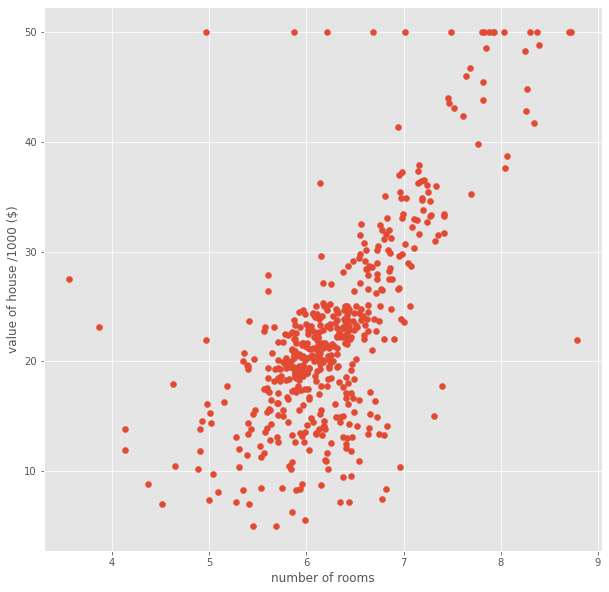

In [12]:
# Plot the variables

plt.figure(figsize=(10,10))
plt.scatter(Xb,yb)
plt.ylabel('value of house /1000 ($)')
plt.xlabel('number of rooms')
plt.show()

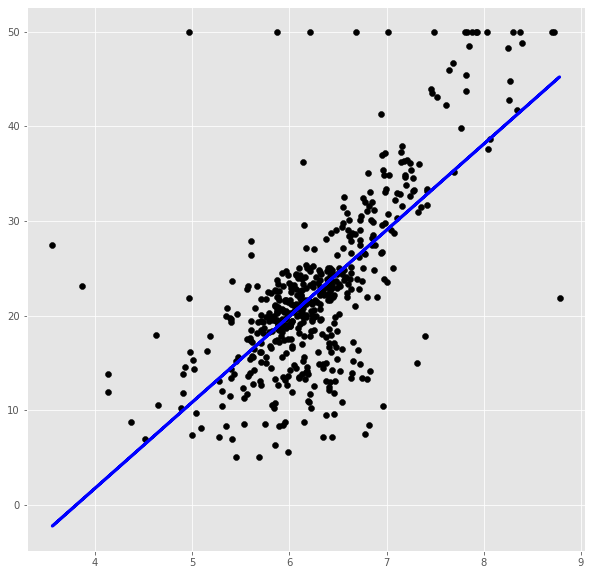

In [15]:
# Create the model
regr = linear_model.LinearRegression()

# Train the model

regr.fit( Xb, yb)

# Generate plots
plt.figure(figsize=(10,10))
plt.scatter(Xb, yb, color='black')
plt.plot(Xb, regr.predict(Xb), color='blue', linewidth=3)
plt.show();

# Logistics Regression

In [16]:
# dataset

X1 = np.random.normal(size=150)

y1 = (X1 > 0).astype(np.float)

X1[X1 > 0] *= 4

X1 += .3 * np.random.normal(size=150)

X1= X1.reshape(-1, 1)

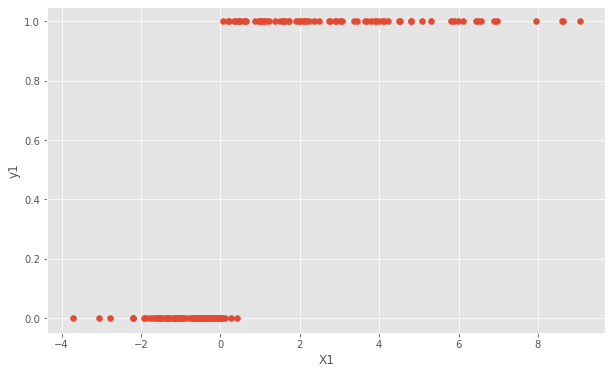

In [20]:
# Plot data
plt.figure(figsize=(10,6))
plt.scatter(X1,y1)
plt.ylabel('y1')
plt.xlabel('X1')
plt.show()

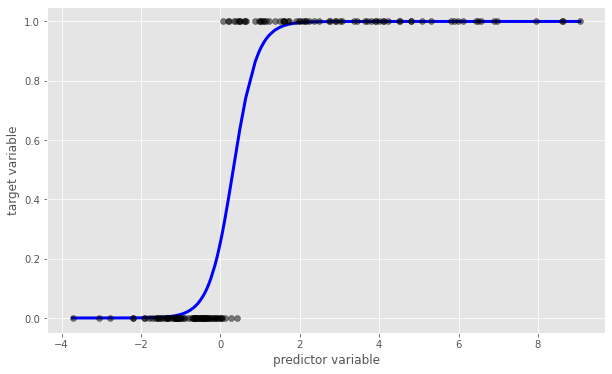

In [21]:
# Run the logistic regression analysis

lm_log = linear_model.LogisticRegression()
lm_log.fit(X1, y1)

# Plot the model

X1_ordered = np.sort(X1, axis=0)
plt.figure(figsize=(10,6))
plt.scatter(X1.ravel(), y1, color='black', zorder=20 , alpha = 0.5)
plt.plot(X1_ordered, lm_log.predict_proba(X1_ordered)[:,1], color='blue' , linewidth = 3)
plt.ylabel('target variable')
plt.xlabel('predictor variable')
plt.show();

# Quantile Regression

In [22]:
import statsmodels.formula.api as smf

# generate a random dataset with two variables

df = pd.DataFrame(np.random.normal(0, 1, (100, 2)))
df.columns = ['x', 'y']

In [23]:
# develop a linear regression model (for comparison)

x = df['x']
y = df['y']
fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), num=len(y))

# develop the quantile regression model for six quantiles

model = smf.quantreg('y ~ x', df)
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
fits = [model.fit(q=q) for q in quantiles]

# the quantile lines

_y_005 = fits[0].params['x'] * _x + fits[0].params['Intercept']

_y_095 = fits[5].params['x'] * _x + fits[5].params['Intercept']

# start and end coordinates of the quantile lines

p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]]) #first point of 0.05 quantile fit line
b = np.array([_x[-1], _y_005[-1]]) #last point of 0.05 quantile fit line
a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

# mask for coordinates above 0.95 or below 0.05 quantile lines

mask = lambda p, a, b, a_, b_: (np.cross(p-a, b-a) > 0) | (np.cross(p-a_, b_-a_) < 0)
mask = mask(p, a, b, a_, b_)

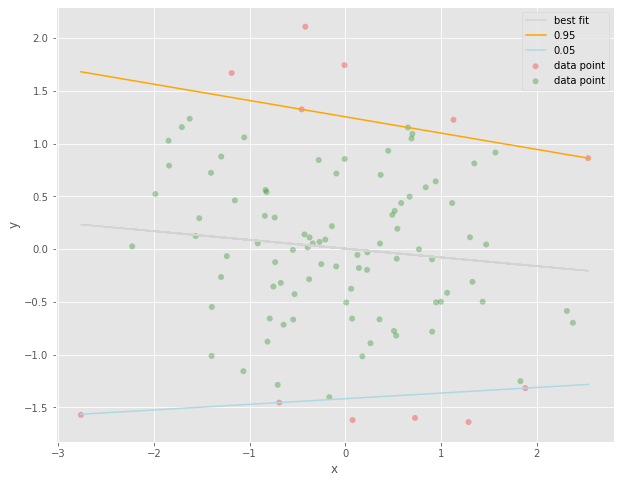

In [25]:
# generate the plots

figure, axes = plt.subplots(figsize=(10,8))
axes.scatter(x[mask], df['y'][mask], facecolor='r', edgecolor='none', alpha=0.3, label='data point')
axes.scatter(x[~mask], df['y'][~mask], facecolor='g', edgecolor='none', alpha=0.3, label='data point')
axes.plot(x, fit[0] * x + fit[1], label='best fit', c='lightgrey')
axes.plot(_x, _y_095, label=quantiles[5], c='orange')
axes.plot(_x, _y_005, label=quantiles[0], c='lightblue')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show();

# Regularization

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# Loading the data

data = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

# Drop the non-numerical variables and those with missing values

dropColumns = ['id', 'date', 'sqft_above', 'zipcode']
data = data.drop(dropColumns, axis = 1)

# Determine the dependent and independent variables

y = data['price']
X = data.drop('price', axis = 1)

# Divide the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Develop a Linear Regression model

In [29]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

### Evaluate the Linear Regression model

In [30]:
print(linearModel.score(X_test, y_test))

0.7011775027160145


### Develop Ridge(L2) Regression Model

In [31]:
# Estimate different values for lamda

alpha = []
cross_val_scores_ridge = []

# Loop to compute the different scores

for i in range(1, 9):

    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

In [32]:
# Loop to print the different scores

for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 0.6908949708276652
0.5 : 0.6908967368537839
0.75 : 0.6908983055353471
1.0 : 0.6908996788999434
1.25 : 0.6909008589519249
1.5 : 0.6909018476727103
1.75 : 0.6909026470210977
2.0 : 0.6909032589335607


In [33]:
# the best value of lamda for the data is 2

# Build the Ridge Regression model for the best lamda

ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

Ridge(alpha=2)

### Evaluate the Ridge Regression model

In [34]:
print(ridgeModelChosen.score(X_test, y_test))

0.7010425664418978


### Develop Lasso(L1) Regression Model

In [35]:
# Estimate different values for lamda

lamda = []
cross_val_scores_lasso = []

# Loop to compute the different scores

for i in range(1, 9):

    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)
    cross_val_scores_lasso.append(avg_cross_val_score)
    lamda.append(i * 0.25)

In [36]:
# Loop to print the different scores

for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 0.6908930606738558
0.5 : 0.6908931157130693
0.75 : 0.6908931704585155
1.0 : 0.6908932249597728
1.25 : 0.6908932791842866
1.5 : 0.6908933331350489
1.75 : 0.690893386827507
2.0 : 0.6908934402400366


In [37]:
# the best value of lamda for the data is 2

# Build the Lasso Regression model for the best lamda

lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

Lasso(alpha=2, tol=0.0925)

### Evaluate the Lasso Regression model

In [38]:
print(lassoModelChosen.score(X_test, y_test))

0.7011751151846217
